# Анализ бизнес-показателей

Описание проекта:

Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.


Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.


Мне предстоит изучить:

* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.


**Описание данных**

В моем распоряжении три датасета. 

* Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта
* orders_info_short.csv — информацию о заказах
* costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Region — страна пользователя,
* Device — тип устройства пользователя,
* Channel — идентификатор источника перехода,
* Session Start — дата и время начала сессии,
* Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

* User Id — уникальный идентификатор пользователя,
* Event Dt — дата и время покупки,
* Revenue — сумма заказа.

Структура costs_info_short.csv:

* dt — дата проведения рекламной кампании,
* Channel — идентификатор рекламного источника,
* costs — расходы на эту кампанию.

### Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

#### Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
# загружаем библиотеки
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# открываем данные
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#  Взглянем на таблицу "visits"
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# изучим "orders"
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
# и "costs"
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Вывод:** 
Видим что наименование столбцов можно привезти к "змеиному регистру" и строчными, дату  к "нормальнуому" типу данных.

In [9]:
# первая таблица
visits.rename(columns = {'User Id':'user_id','Region':'region','Device':'device','Channel':'channel',
                         'Session Start':'session_start','Session End':'session_end'}, inplace = True )

In [10]:
visits[['session_start','session_end']] = visits[['session_start','session_end']].apply (pd.to_datetime)

In [11]:
# вторая таблица
orders.rename(columns = {'User Id':'user_id','Event Dt':'event_dt','Revenue':'revenue'}, inplace = True )

In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [13]:
# третья таблица
costs.columns = costs.columns.str.lower()

In [14]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверим, все ли получилось

In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [17]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Теперь приступим к этапу предобработки

In [18]:
# первая таблица
visits.duplicated().sum()

0

In [19]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

Явных дубликатов и пропусков не обнаружено

In [20]:
# Взглянем более подробно на названия, может что пропустили
visits.region.sort_values().unique()

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

In [21]:
visits.device.sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

In [22]:
visits.channel.sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

In [23]:
# вторая таблица
orders.duplicated().sum()

0

In [24]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

Так же нет явных дубликатов

In [25]:
# третья таблица
costs.duplicated().sum()

0

In [26]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [27]:
costs.channel.sort_values().unique()

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

#### Вывод: 

Загружены библиотеки и  файлы с датасетами.
Дубликатов и пропусков не обнаруженно. 
Столбцам содержащие данные с датой присвоен соответствующий тип данных. 
Названия столбцов приведены к стилизованному формату. 
Проблем с содержанием в таблицах не наблюдается, можно приступать к дальнешей работе.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [28]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [29]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [30]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [31]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [32]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [34]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()#bbox_to_anchor=(1.0, 1.05), loc='upper left')
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [35]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV', fontsize=25)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=25)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей', fontsize=25)


    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI', fontsize=25)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=25)
    
    plt.tight_layout()
    plt.show()

#### Вывод:
В этом шаге были созданы функции
* get_profiles() — для создания профилей пользователей,
* get_retention() — для подсчёта Retention Rate (коэффициент, который отражает способность компании выстраивать крепкие отношения с покупателями)
* get_conversion() — для подсчёта конверсии(доля людей, перешедших из одного состояния в другое)
* get_ltv() — для подсчёта LTV и ROI (LTV - жизненная ценность клиента. То есть прибыль, которую вы получите от клиента за все время работы с ним. ROI - коэффициент рентабельности инвестиций. Простыми словами — окупаемости вложений.)

А также функции для построения графиков:

* filter_data() — для сглаживания данных,
* plot_retention() — для построения графика Retention Rate
* plot_conversion() — для построения графика конверсии
* plot_ltv_roi — для визуализации LTV и ROI

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Создаем профили пользователей

In [36]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [37]:
#Находим минимальную дату привлечения
profiles.first_ts.min()

Timestamp('2019-05-01 00:00:41')

In [38]:
#максимальная дата привлечения
profiles.first_ts.max()

Timestamp('2019-10-27 23:59:04')

**Вывод:** 
Минимальная дата привлечения пользователей 1 мая 2019 года, максимальная - 27 октября 2019 года. Данные о привлечении пользователей соответствуют описанию проекта.

#### Распределение пользователей по странам



Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны:

In [39]:
profiles_countries = (profiles.groupby('region').agg({'user_id':'count', 'payer':['mean', 'sum']}))
profiles_countries

user_id     payer      
                count      mean   sum
region                               
France          17450  0.037994   663
Germany         14981  0.041119   616
UK              17575  0.039829   700
United States  100002  0.069019  6902

**Вывод**

По данным из получившейся таблицы можно сделать вывод, что больше всего пользователей в США, там же число платящих пользователей сильно больше чем в других представленных странах.

Самое маленькое количество как пользователей так и покупателей в Германии.

#### Распределение пользователей по устройствам


Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

In [42]:
devices  = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'})

In [43]:
devices['ratio'] = round(devices['payer'] / devices['user_id'], 3)
devices.rename(columns = {'user_id':'user_total', 'payer':'payer_total'}, inplace = True )
devices

,user_total,payer_total,ratio
device,,,
Android,35032,2050,0.059
Mac,30042,1912,0.064
PC,30455,1537,0.050
iPhone,54479,3382,0.062


**Вывод:** 

По получившейся сводной таблице можно проследить, что больше всего ползователей как платящих, так и пользующихся продуктом бесплатно используют приложение через iphone. При этом наибольшая доля платящих пользователей - среди владельцев mac, а наименьшая - среди клиентов, использующих pc.

#### Распределение пользователей по каналам привлечения


Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения:

In [44]:
channels = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
channels

,user_id,payer
channel,,
AdNonSense,3880,440
FaceBoom,29144,3557
LeapBob,8553,262
MediaTornado,4364,156
OppleCreativeMedia,8605,233
RocketSuperAds,4448,352
TipTop,19561,1878
WahooNetBanner,8553,453
YRabbit,4312,165


In [45]:
channels['ratio'] = round(channels['payer']/channels['user_id'],3)
channels.rename(columns = {'user_id':'user_total', 'payer':'payer_total'}, inplace = True )
channels.sort_values('ratio', ascending = False)

,user_total,payer_total,ratio
channel,,,
FaceBoom,29144,3557,0.122
AdNonSense,3880,440,0.113
lambdaMediaAds,2149,225,0.105
TipTop,19561,1878,0.096
RocketSuperAds,4448,352,0.079
WahooNetBanner,8553,453,0.053
YRabbit,4312,165,0.038
MediaTornado,4364,156,0.036
LeapBob,8553,262,0.031


**Вывод** 

Больше всего пользователей пришли сами собой, без участия рекламных ссылок на различних каналах (канал "organic"). Лидирующими по количеству являюся FaceBoom и TipTop у которых одни из самых больших показателей по количеству привлеченных пользователей. Также показатели дели платящих ялвляется одной из самых высоких. Я бы выделил такой канал, как AdNonSense. Он имеет один из лучших показателей доли платящих клиентов.

#### Общий вывод

Изучив пользоваталей, привлеченных с 1 мая 2019 года по 27 октября 2019 года, сделали следующие наблюдения: больше всего платящих пользователей приходит из США, используют iphone и были привлечены рекламной компанией в FaceBoom.

Большинство клиентов пришли естественным путем, но среди них оказалась наименьшая доля плательщиков. Наименьшая доля платящих пользователей - во Франции, при этом в абсолютном количестве меньше всего платящих пользоваталей приходится на Германию. 

Канал lambdaMediaAds привлек меньше всего клиентов, при этом доля плательщиков в нем составила более 10% - возможно следует увеличить расходы на рекламу в этом источнике.


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Посчитаем общую сумму расходов на маркетинг:

In [46]:
total_costs = costs.costs.sum().round(2)
total_costs

105497.3

In [47]:
#Посчтиаем разбивку суммы по источникам
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Видим, что в TipTop и FaceBoom вложено больше всего средств. Как показало предыдущие исследования вложения в них были не напрастными.

#### Построем визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику, отразим это на одном графике:

In [48]:
#Создадим столбец с номером месяца и номером недели
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

,dt,channel,costs,dt_month,dt_week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


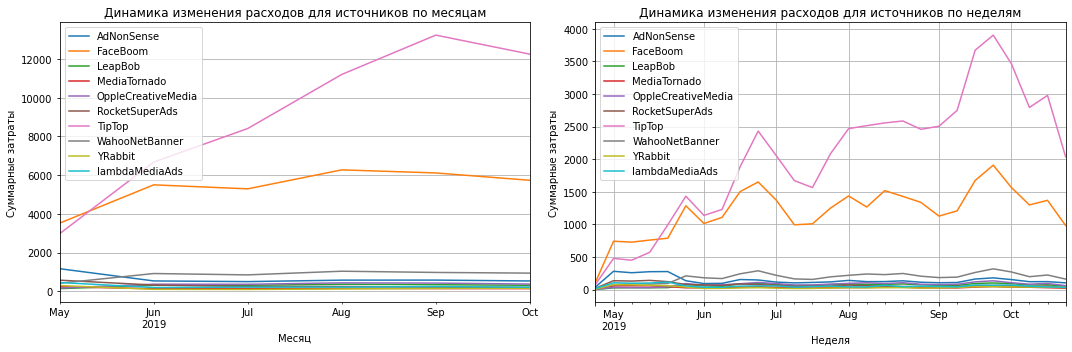

In [50]:
#Строим графики
plt.figure(figsize = (15,5))
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.pivot_table(index='dt_month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Суммарные затраты')
plt.title('Динамика изменения расходов для источников по месяцам')

ax2 = plt.subplot(1,2,2)
costs_pivot = costs.pivot_table(index='dt_week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Суммарные затраты')
plt.title('Динамика изменения расходов для источников по неделям')

plt.tight_layout()
plt.show()

**Вывод:** 
графики потверждают ранее сделанные выводы - самые дорогие рекламные компании у TipTop и FaceBoom. Расходы на них заметно менялись он недели к неделе, но все равно имели общую тенденцию к росту. 

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей:

In [51]:
cac_by_channel = profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)
cac_by_channel

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

In [52]:
# cредний САС по проекту:
cac_by_channel.mean().round(2)

0.69

In [53]:
# средний САС по проекту без учета органических пользователей:
profiles.query('channel != "organic"').acquisition_cost.mean().round(2)

1.13

#### Вывод:
из полученных данных видим что самые дорогие пользователи приходят из TipTop. Среди пользоваталей, пришедших благодаря рекламе, дешевле всего обошлось привлеченние одного пользователя через канал leapbob.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Считая, 
что на календаре 1 ноября 2019 года, проанализируем окупаемость рекламы. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Исключим из анализа органических пользователей, т.к. они не связаны с затратами на рекламу:

In [54]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ad_profiles = profiles.query('channel != "organic"')

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI:

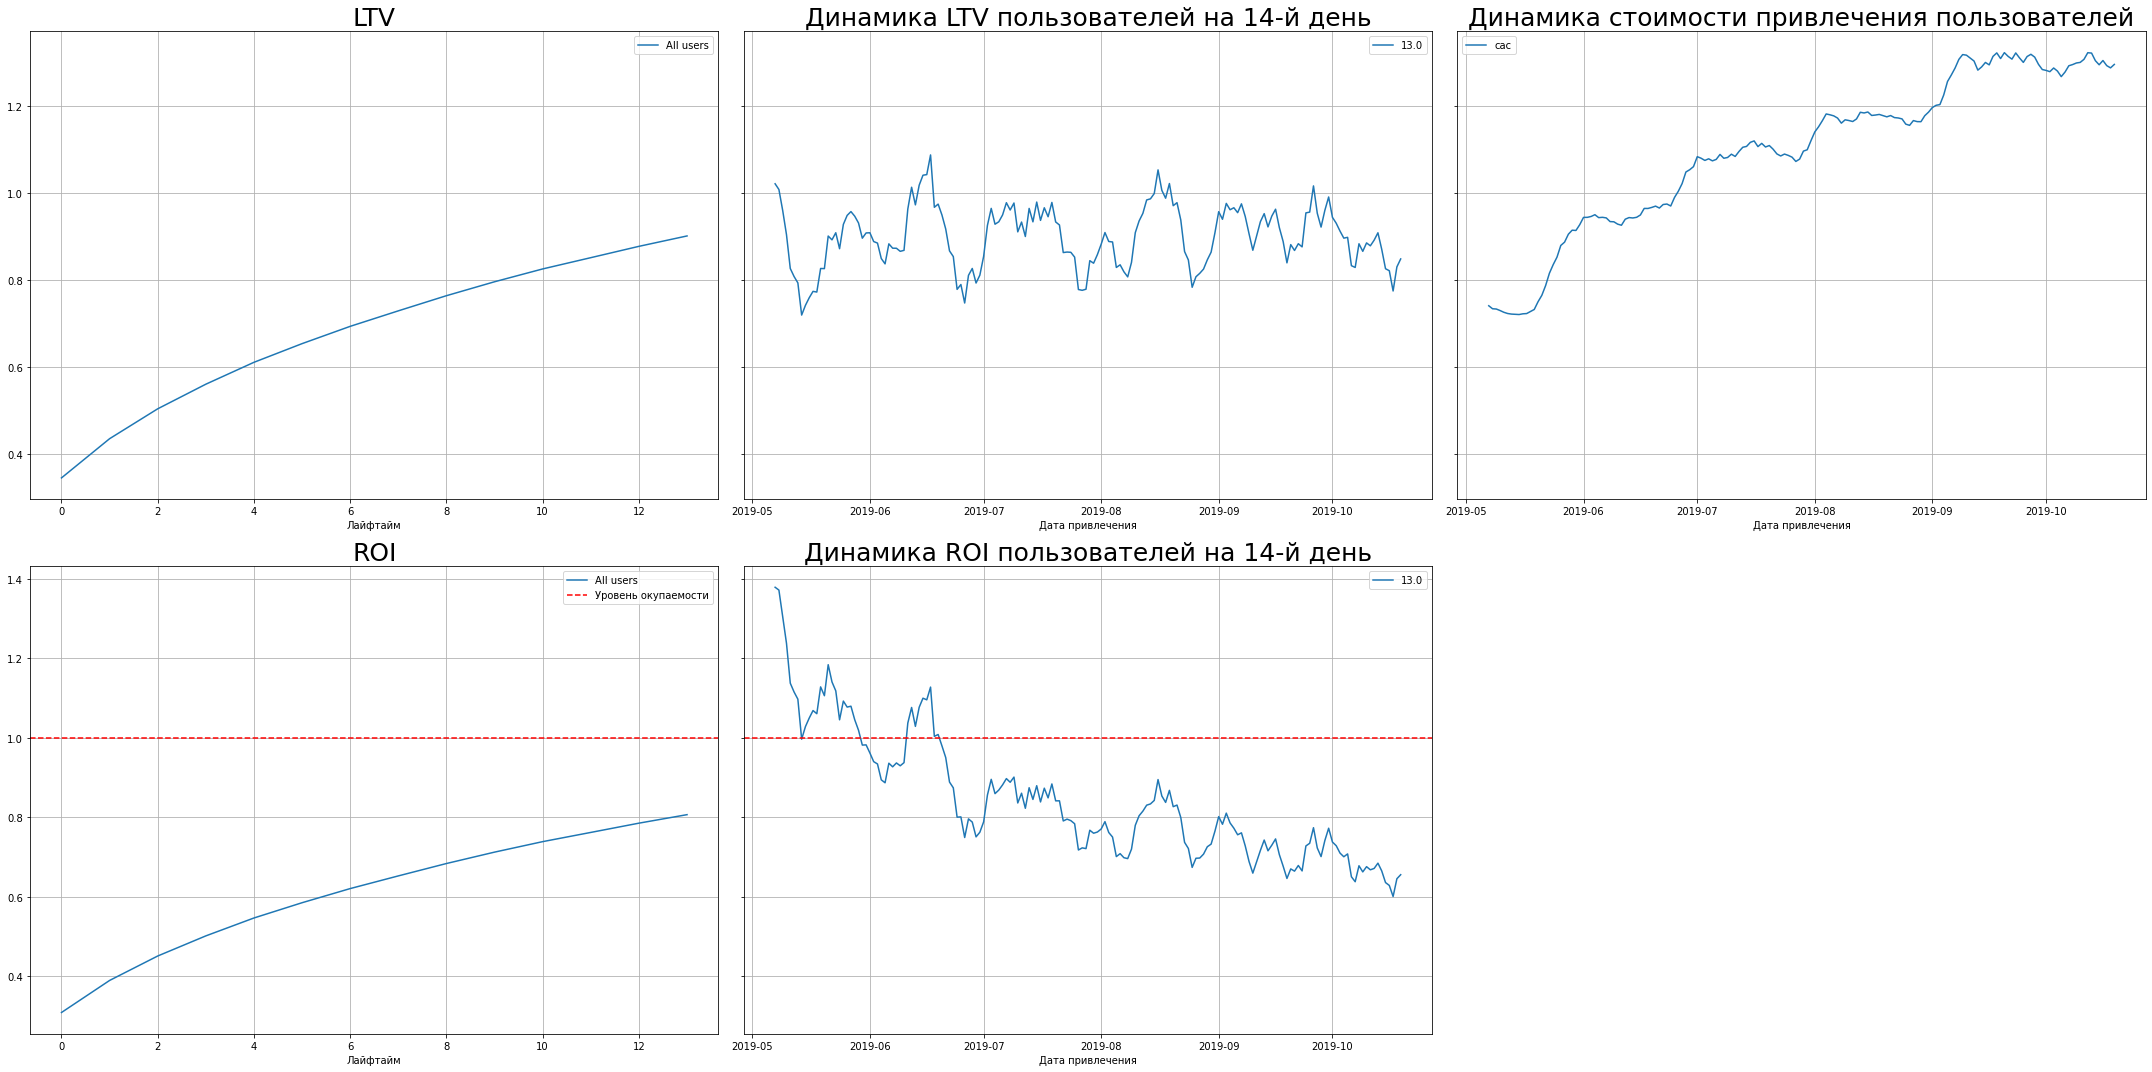

In [55]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** 

* Реклама не окупается. ROI в конце рассматриваемого периода — чуть выше 80%.
* На LTV влияет сезонный фактор, но и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
* Динамика ROI за лайфтайм падает. При относительно стабильной динамике LTV, динамика САС растёт с мая по конец октября. 
Эту закономерность мы наблюдаем в динамике ROI, что при сильном увеличении САС, в равной степени падает динамика ROI пользователей.

#### Проверим конверсию пользователей и динамику её изменения. Посчитаем и визуализируем конверсию

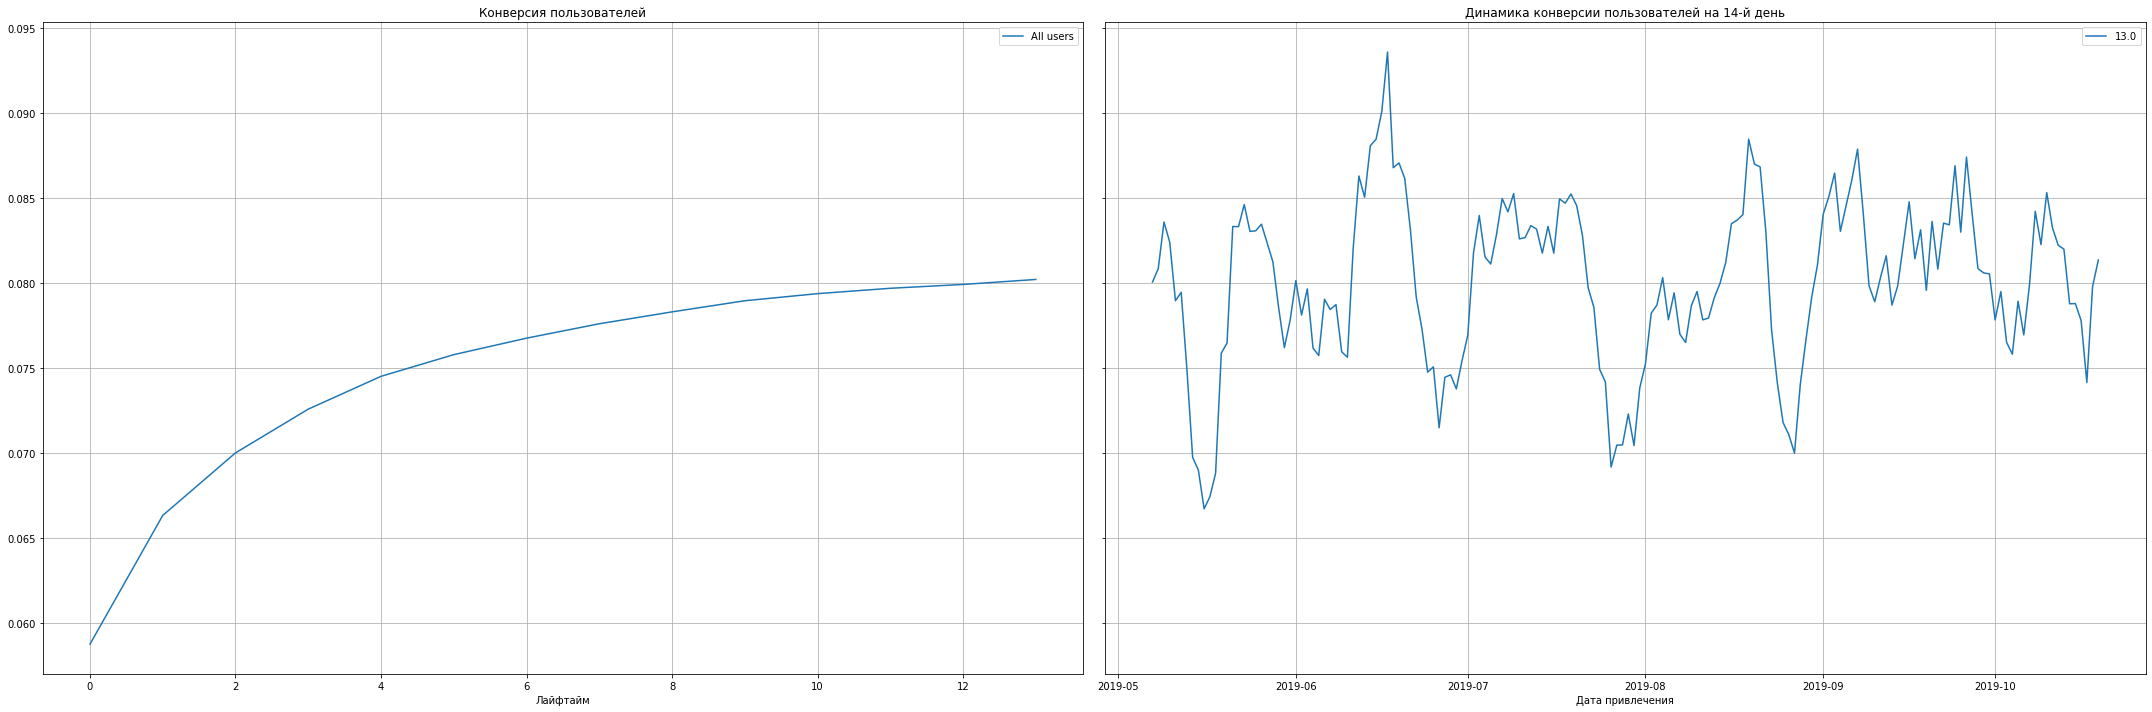

In [56]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** 
Судя по графикам, пользователи конвертируются хорошо.

#### Проверим удержание пользователей и динамику его изменения.

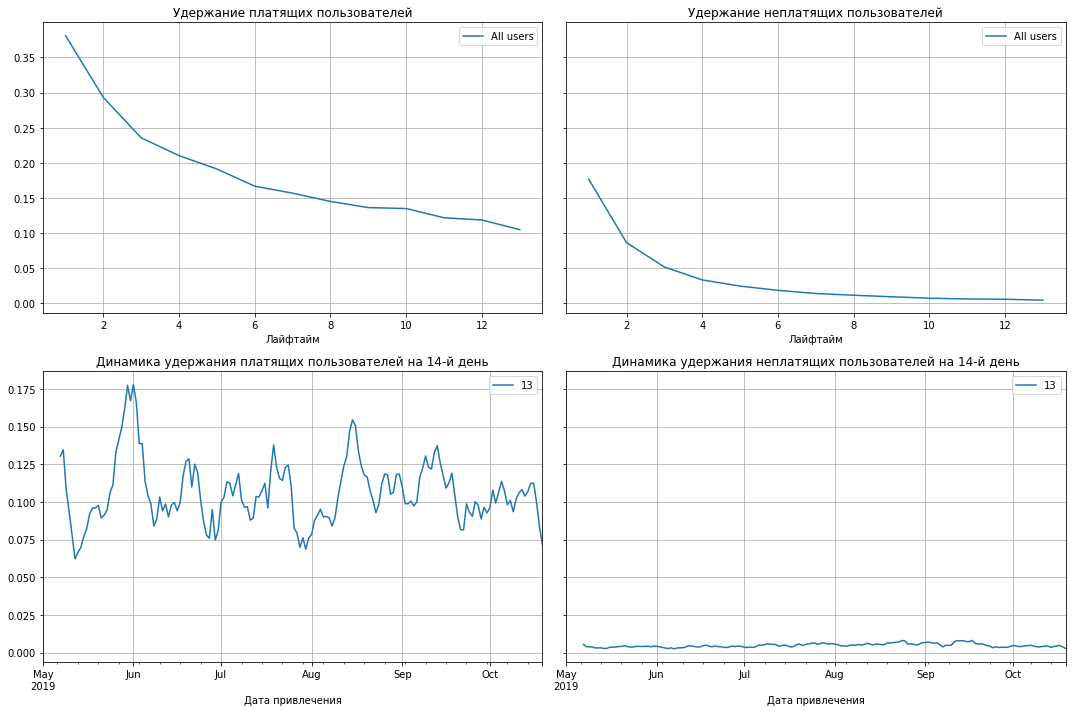

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 

Графики отражают ожидаемую динамику удержания пользоваталей: оно снижается, при этом удержание платящих пользователей выше, чем неплатящих.
Это не помогает нам объяснить неокупаемость рекламы. Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей, а именно: устройству первого посещения, стране и источнику.

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI

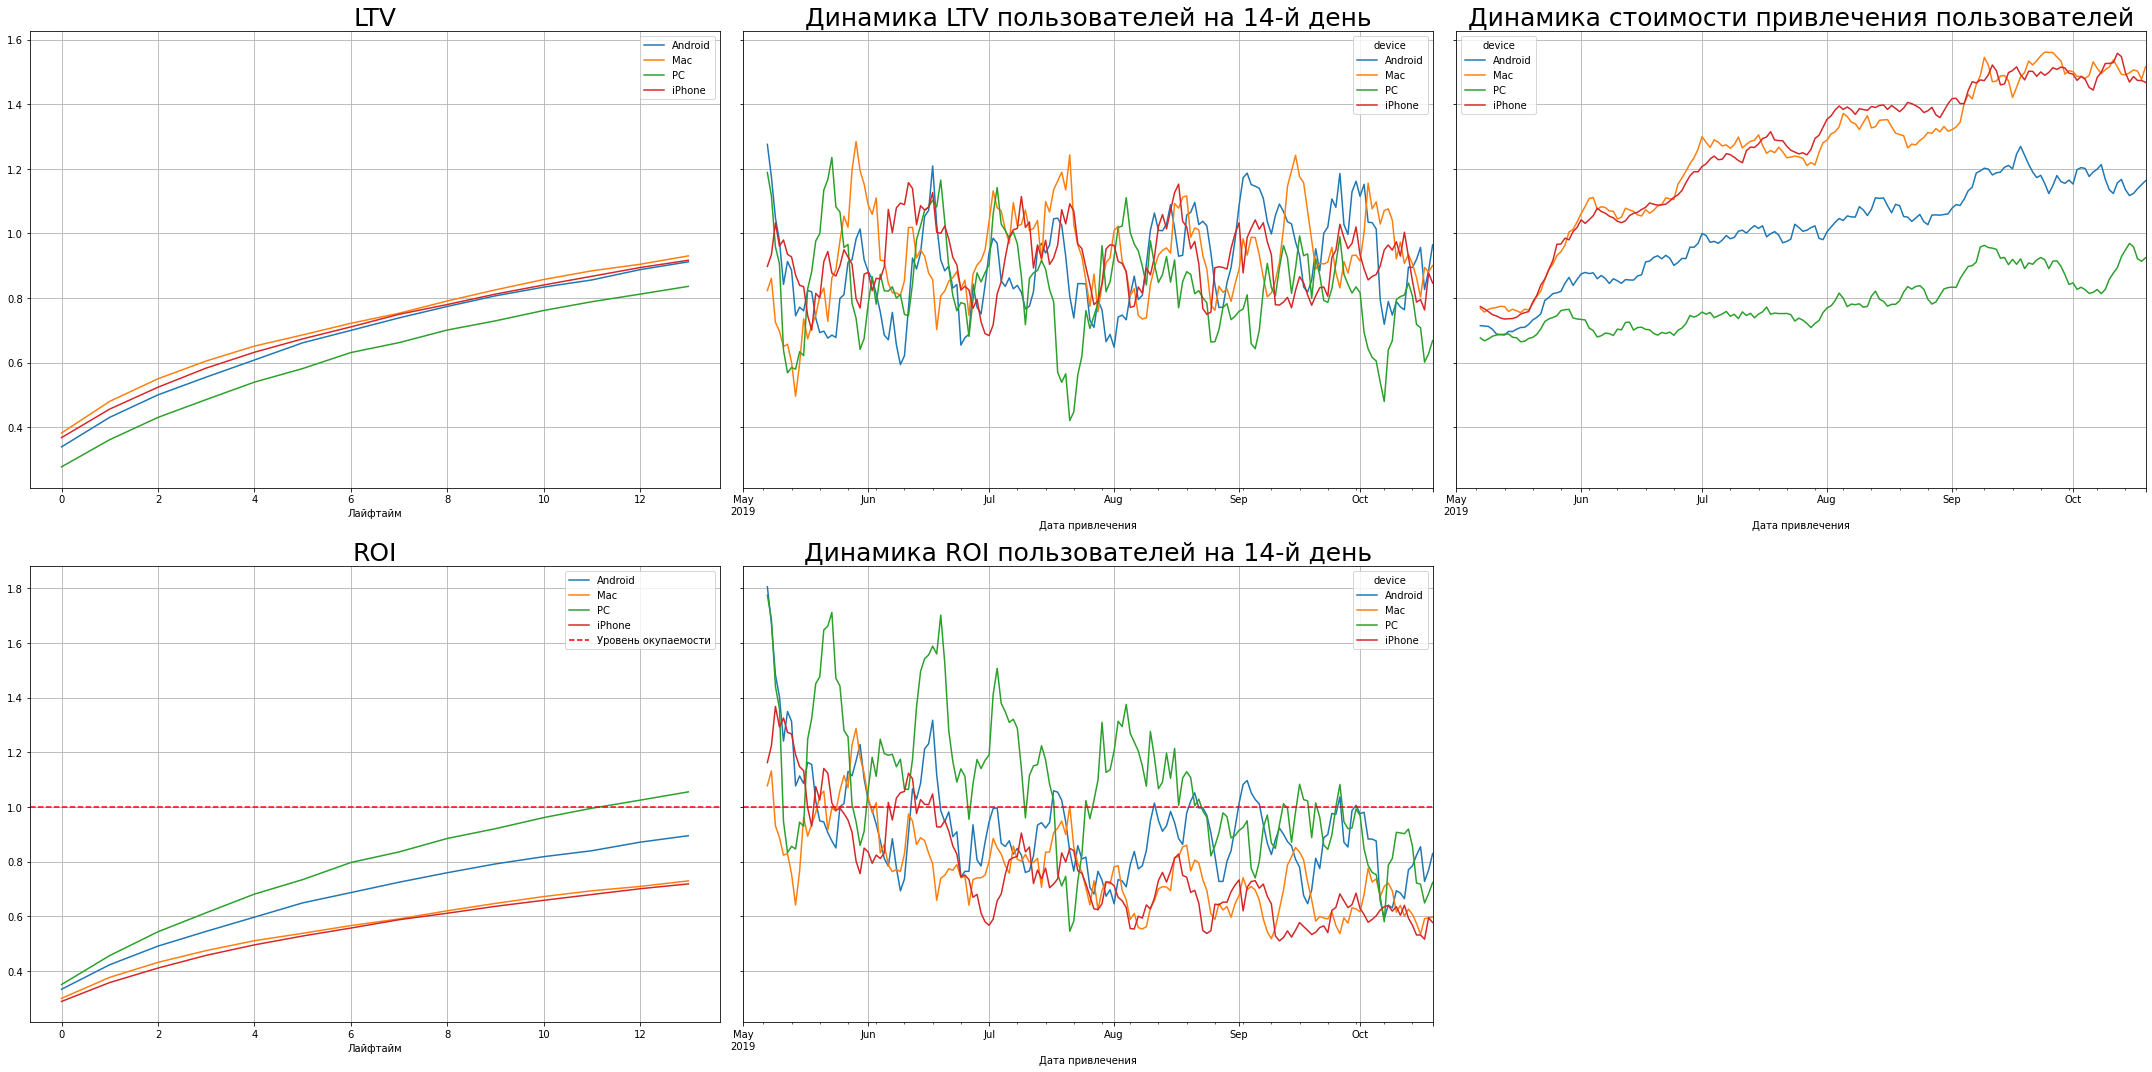

In [58]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** 


* Реклама не окупается у пользоваталей практически всех устройств. 
* LTV в разбивке по устройствам по-прежнему достаточно стабилен. Значит, дело не в ухудшении качества пользователей какой-то отдельной группы устройств.

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI:

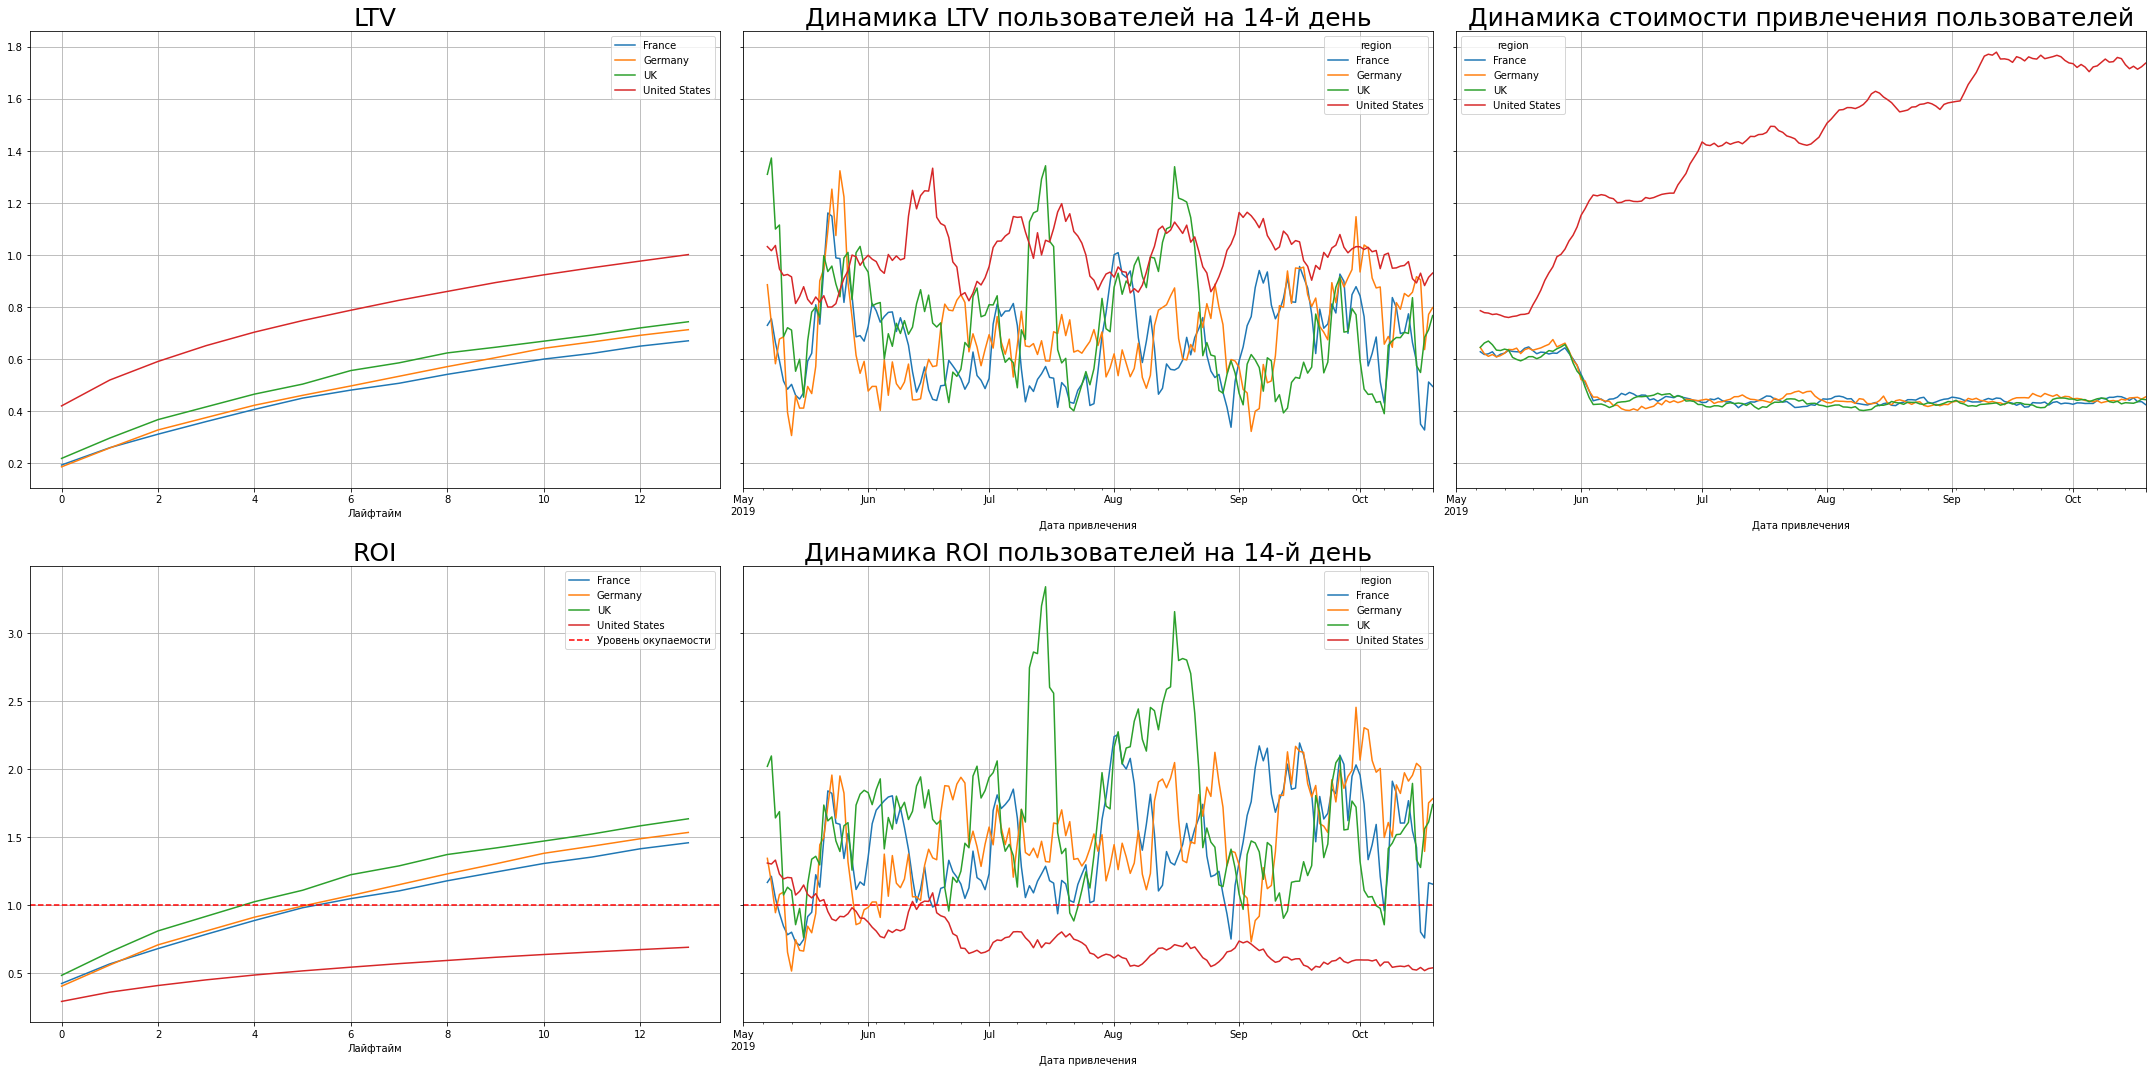

In [59]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** 

Реклама среди пользователей США сильно растет в цене от месяца к месяцу и не окупается. 
У пользоваталейв остальных странах с июня 2019 г. реклама перестала расти в цене и с 4-го месяца вышла на окупаемость.

#### Проанализируем окупаемость рекламы с разбивкой по каналам. Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI: 

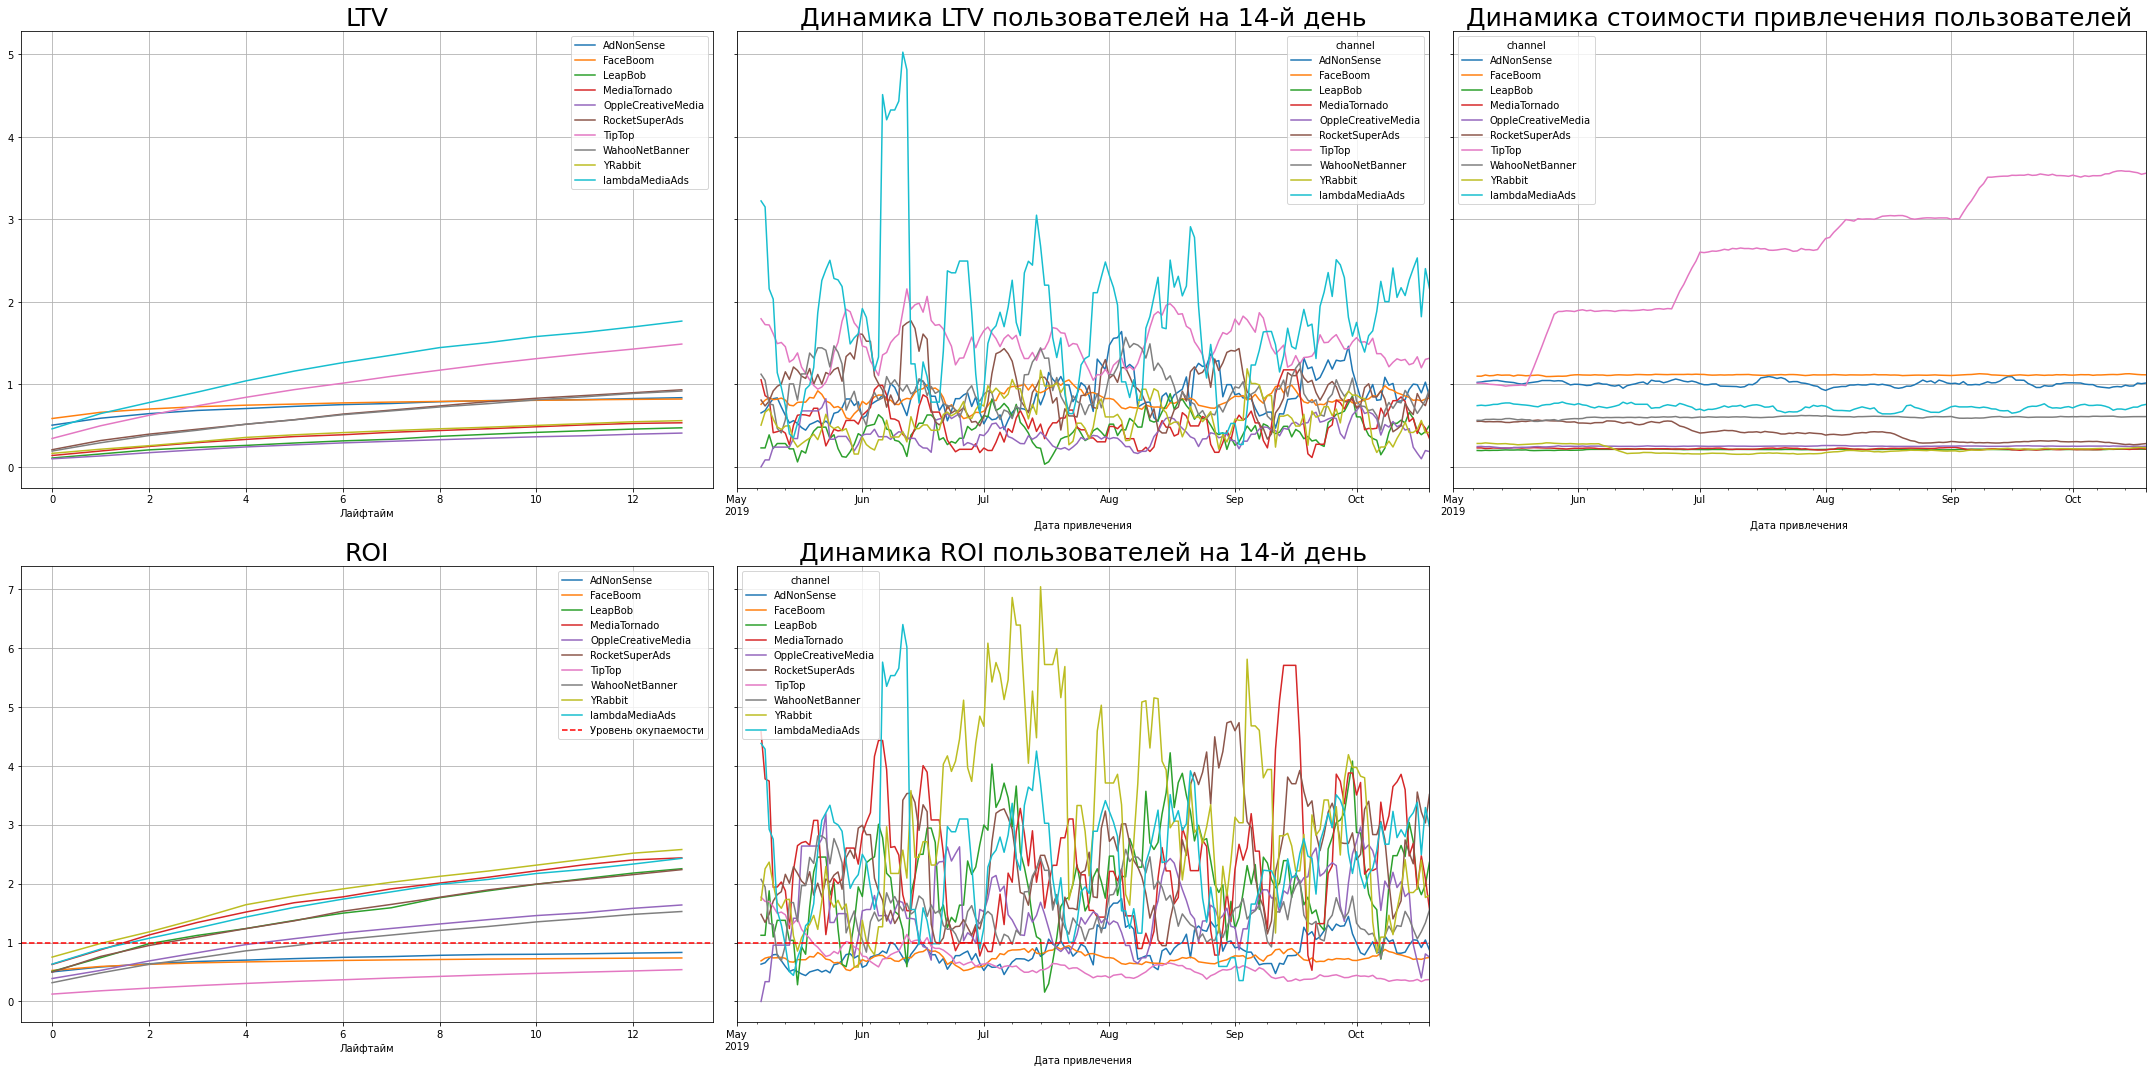

In [60]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**


* В трех источниках: tiptop, faceboom и adnonsense - реклама не окупается. Реклама в остальных каналах начала со 2-5 месяца вышла на окупаемость. 
* CAC пользоваталей, привлеченных каналом tiptop, сильно увеличивался от месяца к месяцу. В то время как стоимость привлечения клиентов через остальные источники оставалась относительно стабильной. Значит, проблема окупаемости может быть связана с неоправланным увеличением рекламного бюджета канала tiptop. 
* Больше всего выручки принесли пользователи, пришедшие блягодаря рекламной компании lambdamediaads, но самым прибыльным оказался канал yrabbit.

#### Конверсия пользователей с разбивкой по устройствам

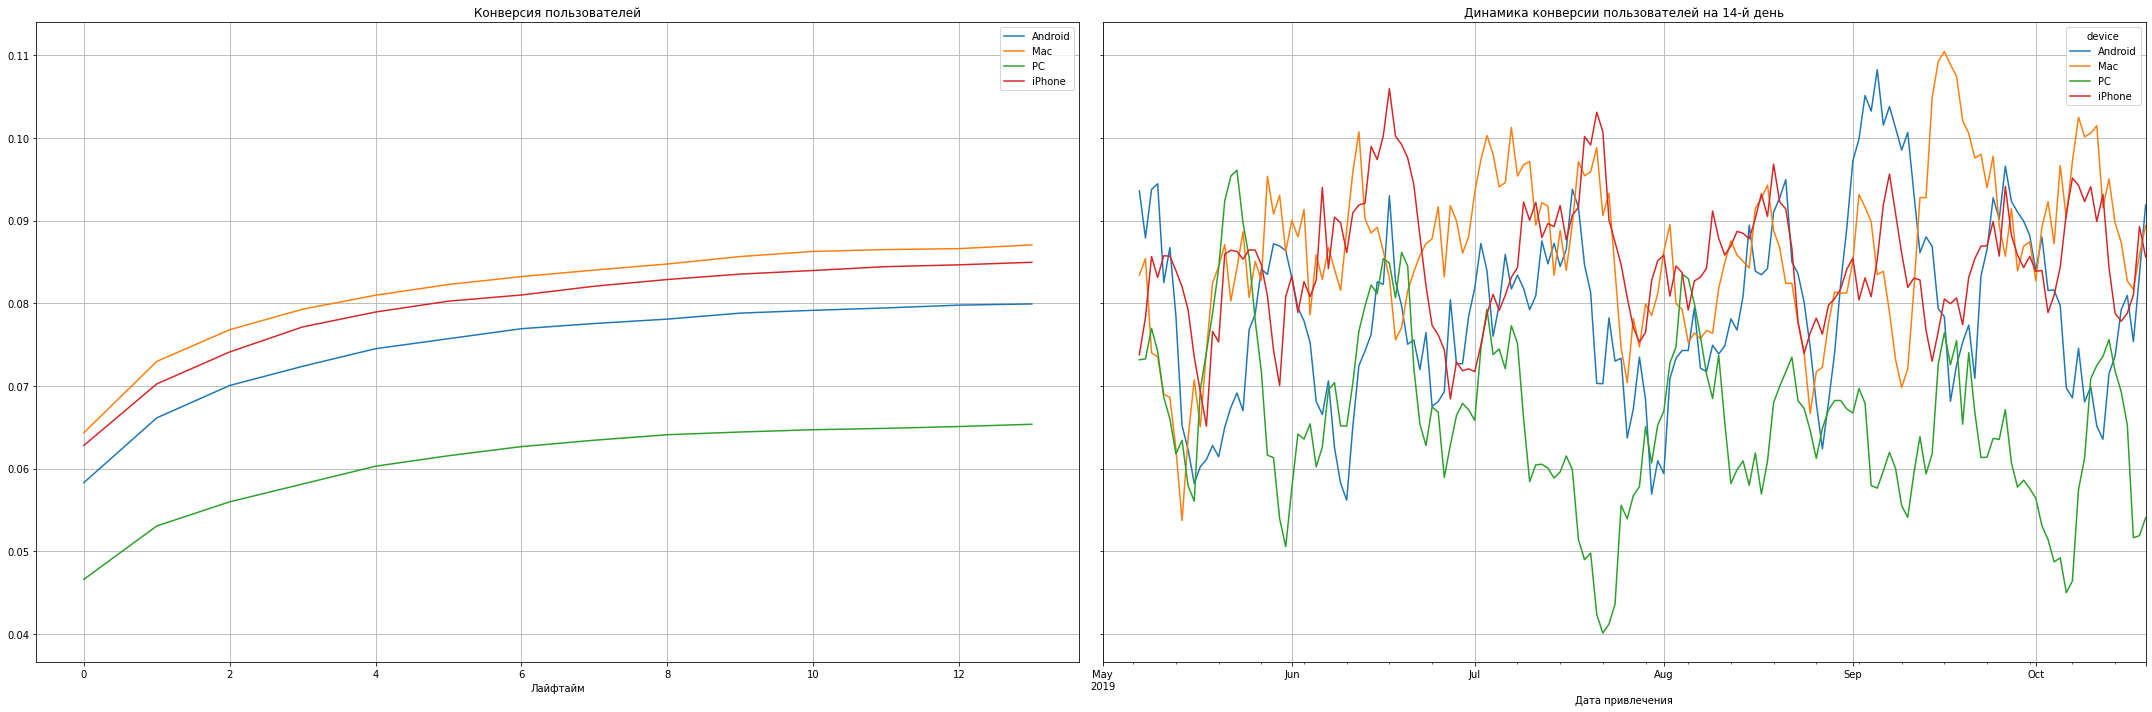

In [61]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = dimensions 
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** 
Судя по графикам, пользователи mac и iphone конвертируются хорошо, видимо дело в удержании. Хуже и неравномернее всего конвертируются пользователи pc.

#### Удержание пользователей с разбивкой по устройствам

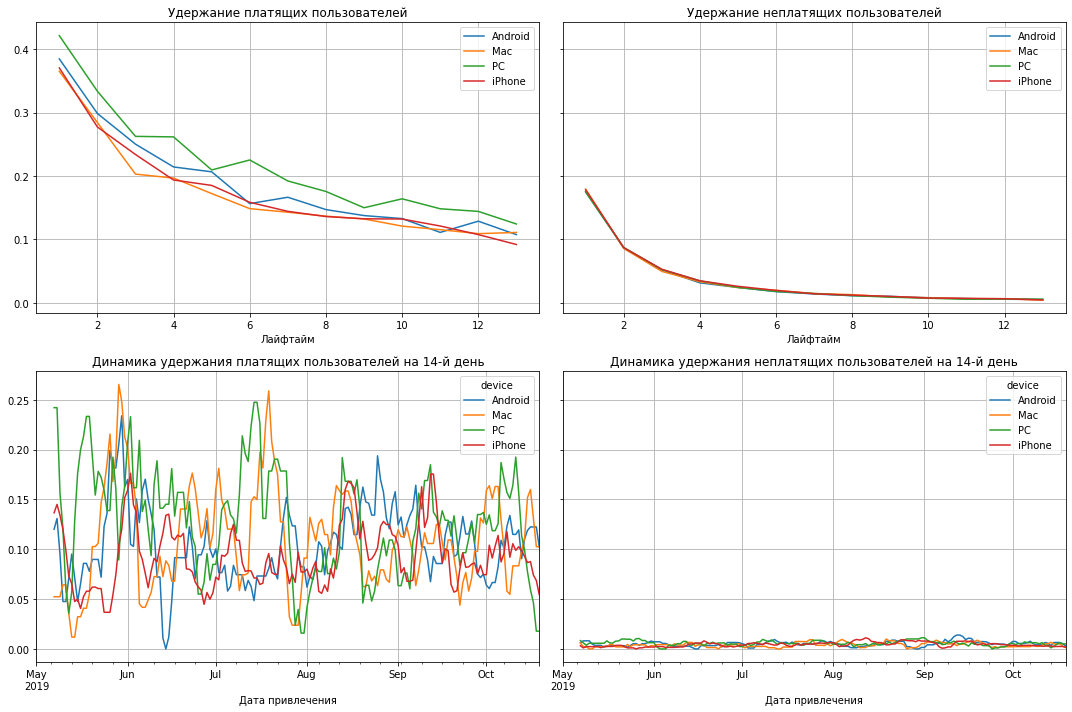

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** 

Графики подтверждают предплоложение из предыдущего пункта: пользователи mac и iphone удерживаются хуже всего. Возможно, это одна из причин низкой окупаемости.

#### Конверсия пользователей с разбивкой по странам

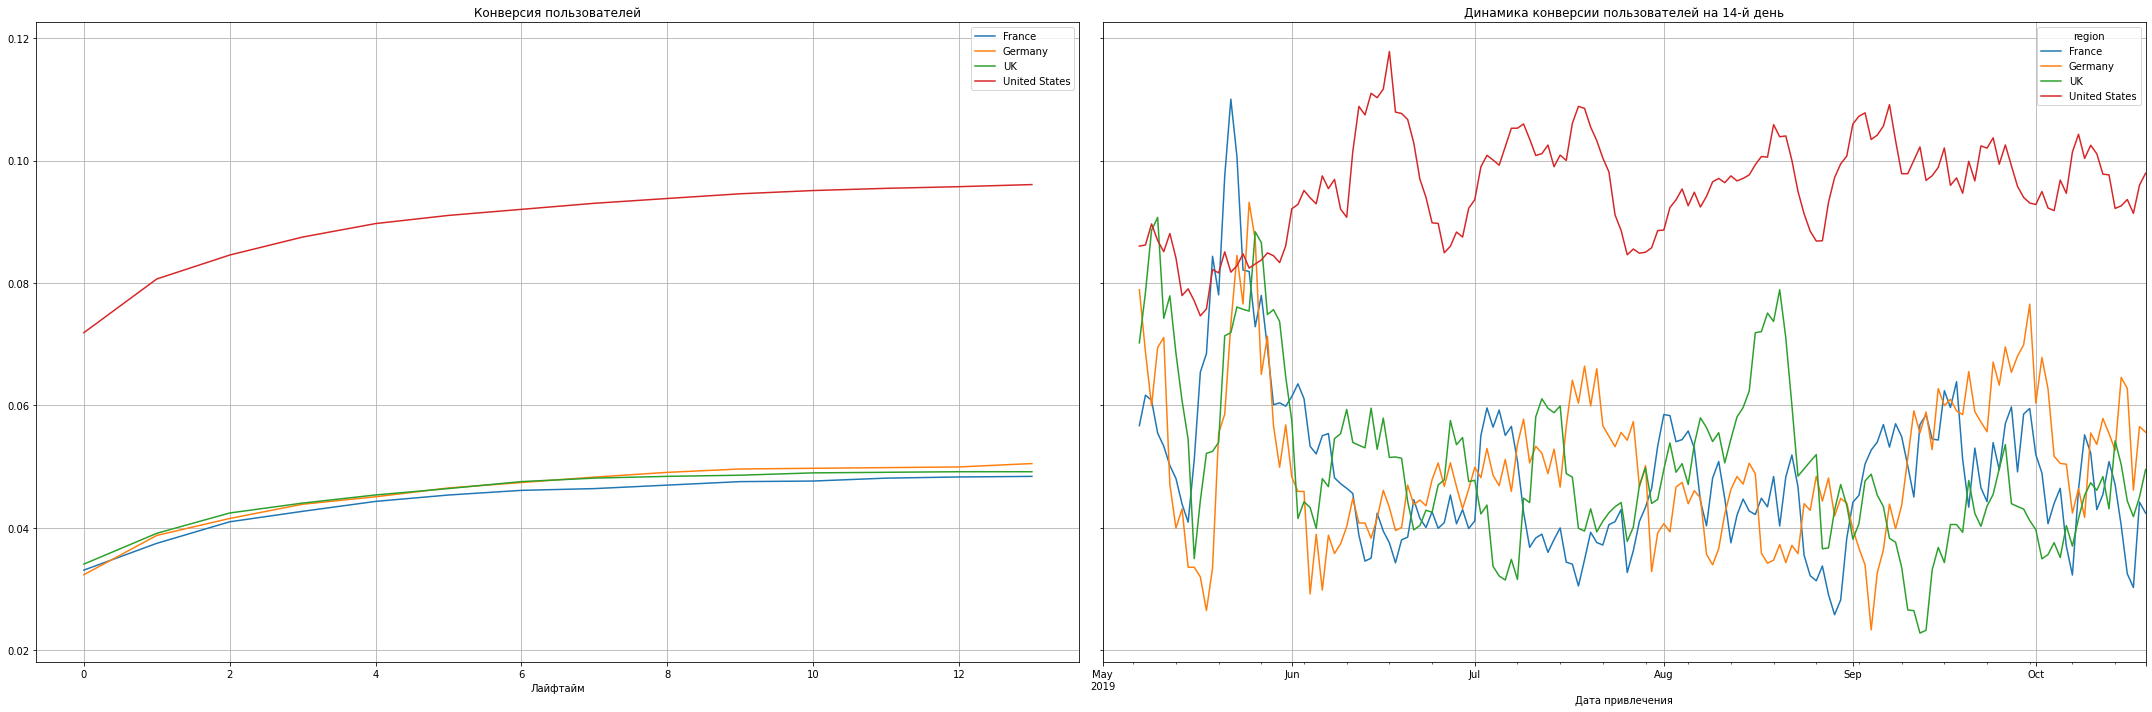

In [63]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** 
Судя по графикам, пользователи из США отличаются очень высокой конверсией по сравнению с другими странами.

#### Удержание пользователей с разбивкой по странам

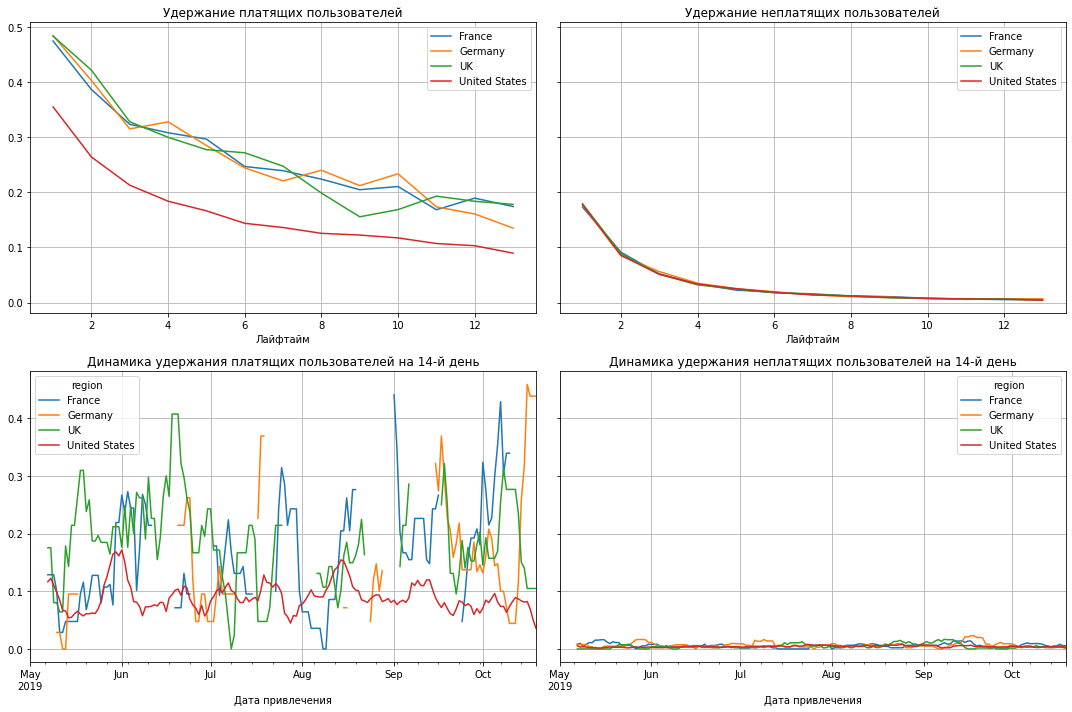

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Пользователи из США очень хорошо конвертируются, но стабильно очень плохо удерживаются.

#### Конверсия пользователей с разбивкой по каналам

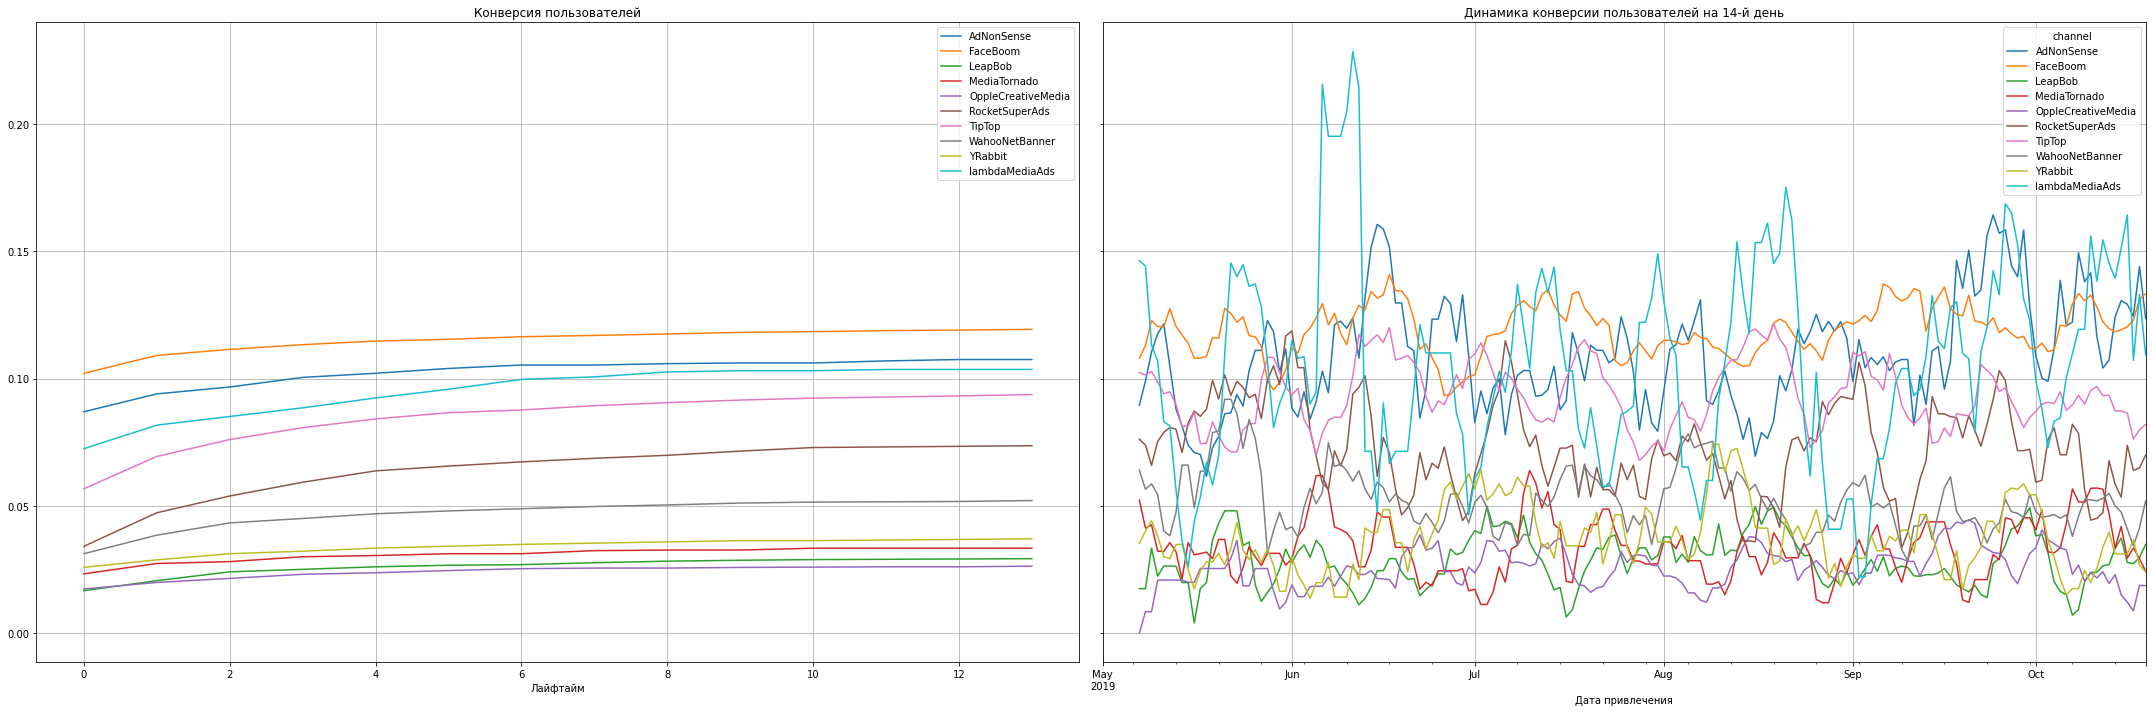

In [65]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    ad_profiles, orders, observation_date, horizon_days, dimensions = dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:**
Судя по графикам, пользователи, пришедшие благодаря рекламе в faceboom и adnonsense, отличаются очень высокой конверсией. Может быть низкая окупаемость также связана с тем, что они плохо удерживаются.

#### Удержание пользователей с разбивкой по каналам

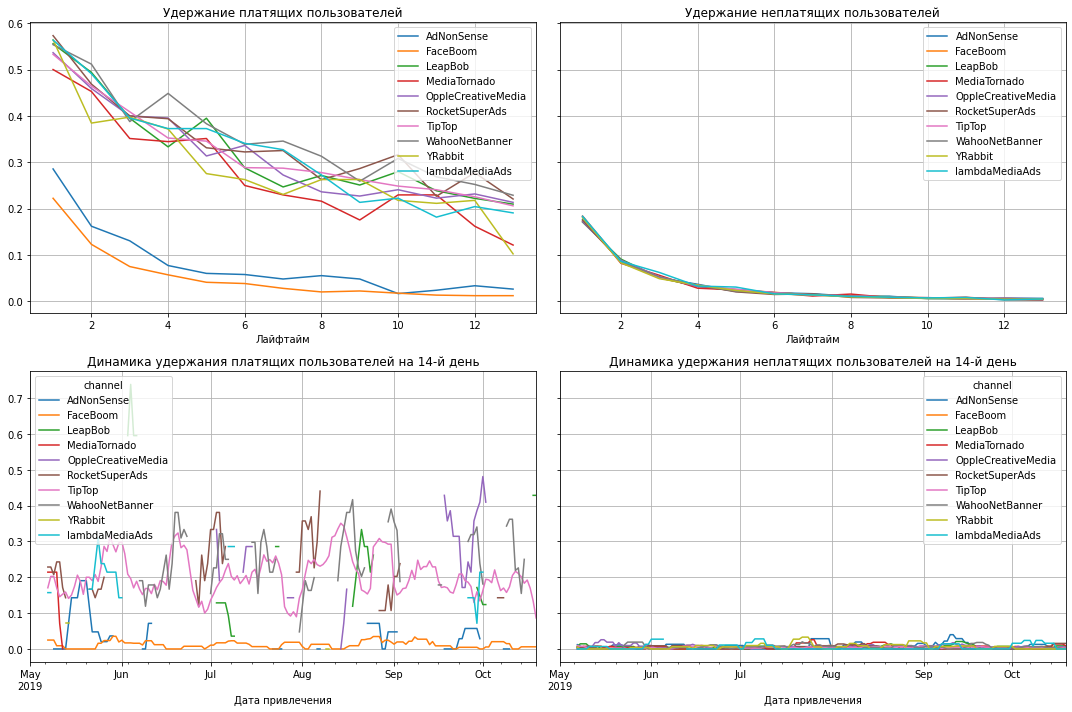

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    ad_profiles, visits, observation_date, horizon_days, dimensions = dimensions)
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**
Пользователи, пришедшие благодаря рекламе в faceboom и adnonsense, очень хорошо конвертируются, но стабильно очень плохо удерживаются.

#### Общие выводы:
* В целом реклама, направленная на привлечение пользователей, не окупается.
* Расходы на рекламу для пользоваталей mac, iphone и android можно уменьшить, эти устроиства и без того приводят в сервис много пользоваталей. Также крайне негативное влияние на окупаемость оказали рекламные компании в США и реклама в канале tiptop. Расходы на эти рекламные компании также рекомендуется сократить.
* Для увеличения окупаемости можно провести мероприятия по увеличению удержания пользоваталей pc, проживающих в США и приходящих через рекламные компании в faceboom и adnonsense: выяснить проблемы, с которым сталкиваются пользователи при использовании сервиса.
* Также для привлечения большего количества пользоваталей можно увеличить количество рекламных компаний в канале yrabbit, т.к. в рассмотренном периоде он оказался самым прибыльным в расчете на одного пользователя, при этом привлек относительно небольшое число клиентов.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Выводы по исследованию:

Чтобы разобраться в причинах убытков компании и помочь ей выйти в плюс, мы провели исследовательский анализ данных о посещениях сайта, заказах и расходах на рекламу.
Изучив пользоваталей, привлеченных с 1 мая 2019 года по 27 октября 2019 года, сделали следующие наблюдения: больше всего платящих пользователей приходит из США, используют iphone и были привлечены рекламной компанией в faceboom. Большинство клиентов пришли естественным путем, но среди них оказалась наименьшая доля плательщиков. Наименьшая доля платящих пользователей - во Франции, при этом в абсолютном количестве меньше всего платящих пользоваталей приходится на Германию.


Большинство клиентов используют iphone, платящие пользователи также предпочитают эти устройства. При этом наибольшая доля платящих пользователей - среди владельцев mac,хотя в абсолютном значении количество платящих пользователей mac существенно ниже iphone. Наименьшая доля платящих пользователей - среди клиентов, использующих pc. 


Суммарные расходны на рекламную компанию составили более 105 млн. Больше всего денег потратили на рекламные компании tiptop и faceboom, на порядок выше всех остальных рекламных источников. Самыми дешевыми оказались рекламные компании yrabbit. Самыми "дорогими" стали пользователи, привлеченные через рекламные компании tiptop. Среди пользоваталей, пришедших благодаря рекламе, дешевле всего обошлось привлеченние одного пользователя через канал leapbob. Исключив из анализа органических пользователей, т.к. они не связаны с затратами на рекламу, установив горизонт анализа две ненели - выполнили оценку окупаемости рекламы. С помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI обнаружили, что: реклама не окупается, CAC сильно увеличился. 

Значит, проблема окупаемости может быть связана с увеличением рекламного бюджета, стабильность LTV говороит о том, что дело не в ухудшении качества пользователей. Проверив конверсию пользователей и динамику её изменения, выяснили, что в целом пользователи конвертируются хорошо, причём постоянно. Пользоваталей pc, проживающие в США и приходящие через рекламные компании в faceboom и adnonsense обладают самой высокой конверсией, но хуже всего удерживаются. 


**Рекомендации для отдела рекламы** 

Оценив окупаемость рекламы, можно сделать такие выводы:

Расходы на рекламные компании в канале tiptop рекомендуется сократить.
Для увеличения окупаемости можно провести мероприятия по увеличению удержания пользоваталей pc, проживающих в США и приходящих через рекламные компании в faceboom и adnonsense, т.к. они обладают самой высокой конверсией, но хуже всего удерживаются. Можно выяснить проблемы, с которым сталкиваются эти пользователи при использовании сервиса.

Для привлечения большего количества пользоваталей можно увеличить количество рекламных компаний в канале lambdamediaads, т.к. в этом канале наибольшая доля платящих пользоваталей и он принес наибольшую выручку. Также для привлечения большего количества пользоваталей можно увеличить количество рекламных компаний в канале yrabbit, т.к. в рассмотренном периоде он оказался самым прибыльным в расчете на одного пользователя, при этом привлек относительно небольшое число клиентов. При этом следует изучить интерес пользоваталей этого канала к нашему приложению, т.к. на текущий момент эти клиенты имеют низкую конвертируемость и сильно падающее удержание на последних днях горизонта.